<table>
  <tr>
    <th style="vertical-align: top;"><h3>Auto-PS-Prognose</h3></th>
    <th style="vertical-align: top;"><h3>Car Horsepower Prediction</h3</th>
  </tr>
  <tr>
    <td style="vertical-align: top;"><p>In diesem linearen Regressionsprojekt zur Vorhersage der Pferdestärken von Autos wird zunächst eine tabellarische und grafische explorative Datenanalyse durchgeführt, um ein besseres Verständnis der Daten zu erlangen und erste Schlussfolgerungen über die Daten zu ziehen. Zur Vorhersage der Pferdestärken werden ML-Regressionsmodelle verwendet.</p><p>Vor dem Training der Modelle wird Lasso zur Merkmalsauswahl eingesetzt, um Redundanzen bei der Anpassung der Modelle zu reduzieren. GridSearchCV wird verwendet, um das optimale Alpha für die Lasso-Regularisierungstechnik zu finden und die Abstimmung der Hyperparameter durchzuführen. Fünf Algorithmen werden zum Trainieren der Modelle verwendet.</p><p>Ein try, catch-Block ist enthalten, um den Fortschritt zu verfolgen. Die Leistungen werden anhand von R-Quadrat und MAE getestet. Das Modell mit der besten Leistung wird dann zur Erstellung von Vorhersagen verwendet. Die Ergebnisse dieser Vorhersagen werden grafisch dargestellt, um die Genauigkeit des Modells zu veranschaulichen.</p><p>
    </p></td>
    <td style="vertical-align: top;"><p>In this linear regression project about predicting car horsepower, initial tabular and graphical exploratory data analysis is performed to gain better data understanding and draw preliminary conclusions about the data. ML regression models are applied to predict horsepower.</p><p>Before training the models, lasso for feature selection is applied to reduce redundancy when fitting the models. GridSearchCV is used to find the optimal alpha for Lasso regularization technique and to perform hyperparameter tuning. Five algorithms are used to train the models.</p><p>A try, catch block is included to keep track of progress. The performances are tested using R square and MAE. The best performing model is then used to make predictions. The results of these predictions are plotted to visualise the accuracy of the model.</p></td>
    </tr>
</table>

In [278]:
# Import data and start the initial data exploration
import pandas as pd
df = pd.read_csv('cars.csv', delimiter=';', skiprows=[1])
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


In [279]:
# Check the data types
pd.set_option('display.width', 1000)
df.dtypes


Car              object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model             int64
Origin           object
dtype: object

In [280]:
# Removing leading and trailing white spaces in the column names as the Car column was not in the index
df.columns = df.columns.str.strip()

In [281]:
# Inspect the unique values in the columns
for col in df.columns:
      print(col, df[col].nunique())

Car 308
MPG 130
Cylinders 5
Displacement 83
Horsepower 94
Weight 356
Acceleration 96
Model 13
Origin 3


In [282]:
# Check for null values
df.isnull().sum()

Car             0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model           0
Origin          0
dtype: int64

In [283]:
# Exploring the cars and their horsepowers exposed that horsepower and MPG had values=0, which is unrealistic
a = df[['Car', 'MPG']].sort_values(by='MPG')
a


,Car,MPG
13,Plymouth Satellite (sw),0.0
367,Saab 900s,0.0
17,Ford Mustang Boss 302,0.0
39,Volkswagen Super Beetle 117,0.0
10,Citroen DS-21 Pallas,0.0
...,...,...
333,Volkswagen Dasher (diesel),43.4
402,Volkswagen Pickup,44.0
332,Volkswagen Rabbit C (Diesel),44.3
336,Honda Civic 1500 gl,44.6


Domain knowledge to help decide whether or not to drop certain rows: The worst MPG (fuel efficiency) is the Lamborghini Aventador, which has an average MPG of around 8 miles per gallon. Also, horsepower of 0 is data entry error.

In [284]:
# Remove rows where these values are 0
df = df[(df['Horsepower']>0) & (df['MPG']>0)]
# Check that they've been dropped
a = df['Horsepower'].sort_values()
b = df['MPG'].sort_values()
#print(a, b)


In [285]:
# Graphical exploratory data anaysis
import matplotlib.pyplot as plt
import seaborn as sns

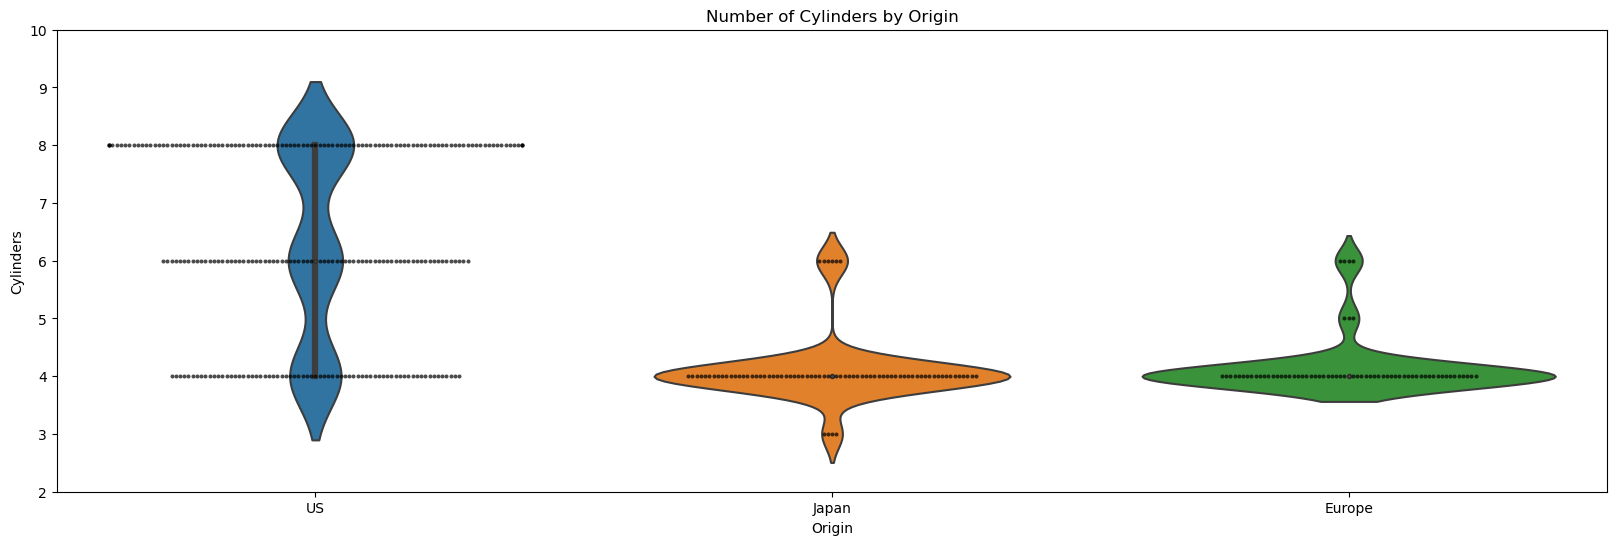

In [286]:
plt.figure(figsize=(20,6))
sns.violinplot(x=df.Origin, y=df.Cylinders)
sns.swarmplot(x=df.Origin, y=df.Cylinders, color="k", alpha=0.7, size=2.9)
# Adjust the y-axis limits to capture the full plots
plt.ylim(bottom=2)  
plt.ylim(top=df.Cylinders.max() + 2)  
plt.title('Number of Cylinders by Origin')
plt.show()

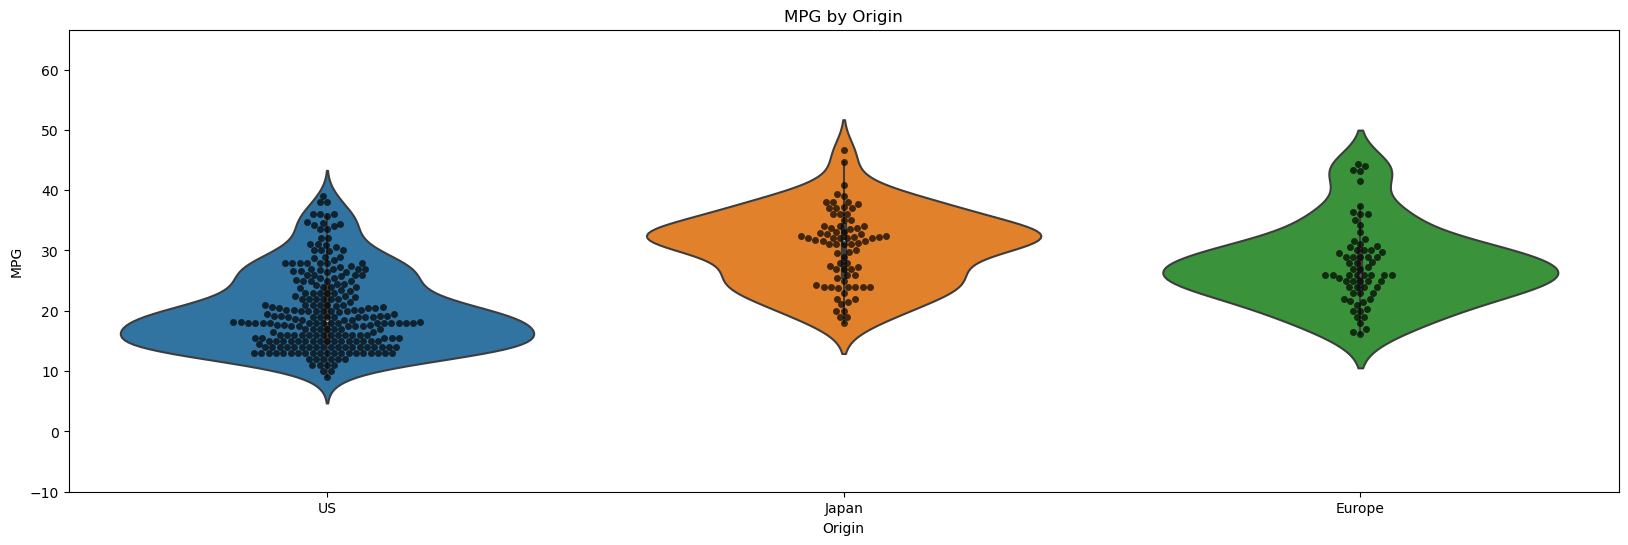

In [287]:
plt.figure(figsize=(20,6))
sns.violinplot(x=df.Origin, y=df.MPG)
sns.swarmplot(x=df.Origin, y=df.MPG, color="k", alpha=0.7)
plt.ylim(bottom=-10)  
plt.ylim(top=df.MPG.max() + 20)  
plt.title('MPG by Origin')
plt.show()

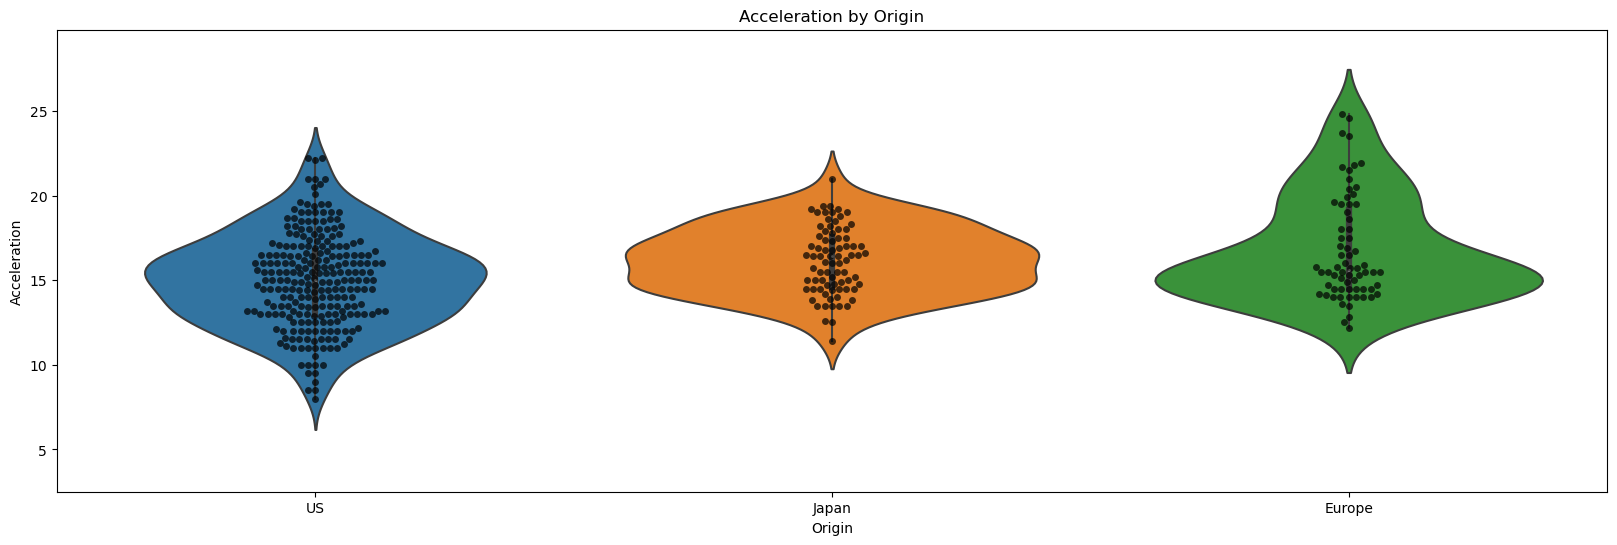

In [288]:
plt.figure(figsize=(20,6))
sns.violinplot(x=df.Origin, y=df.Acceleration)
sns.swarmplot(x=df.Origin, y=df.Acceleration, color="k", alpha=0.7)
plt.ylim(bottom=2.5)  
plt.ylim(top=df.Acceleration.max() + 5)  
plt.title('Acceleration by Origin')
plt.show()

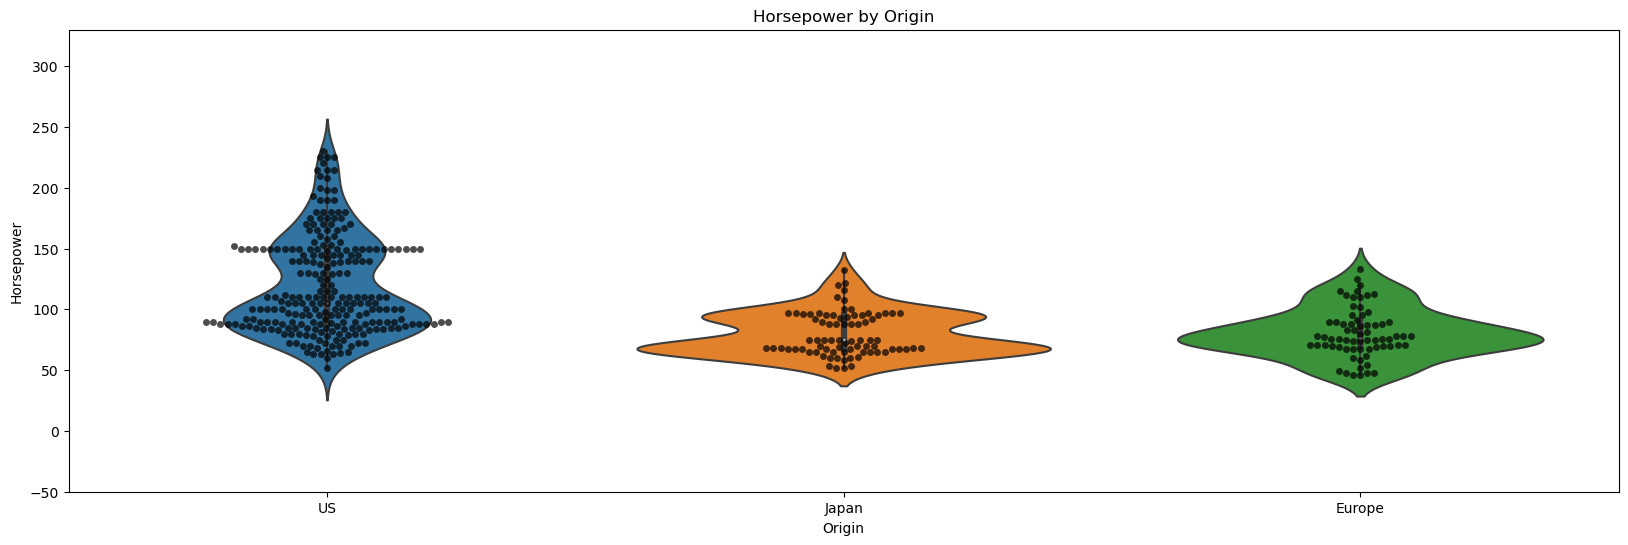

In [289]:
plt.figure(figsize=(20,6))
sns.violinplot(x=df.Origin, y=df.Horsepower)
sns.swarmplot(x=df.Origin, y=df.Horsepower, color="k", alpha=0.7)
plt.ylim(bottom=-50)  
plt.ylim(top=df.Horsepower.max() + 100)  
plt.title('Horsepower by Origin')
plt.show()

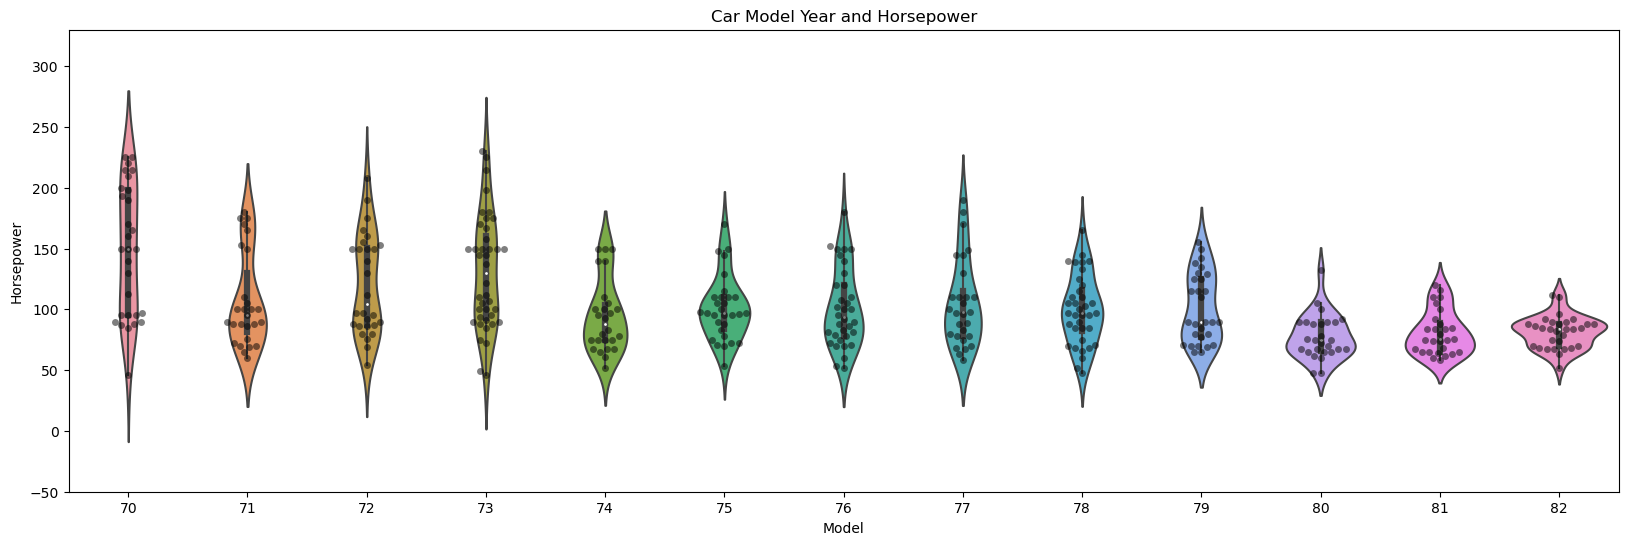

In [290]:
plt.figure(figsize=(20,6))
sns.violinplot(x=df.Model, y=df.Horsepower)
sns.swarmplot(x=df.Model, y=df.Horsepower, color="k", alpha=0.5)
plt.ylim(bottom=-50)  
plt.ylim(top=df.Horsepower.max() + 100)  
plt.title('Car Model Year and Horsepower')
plt.show()

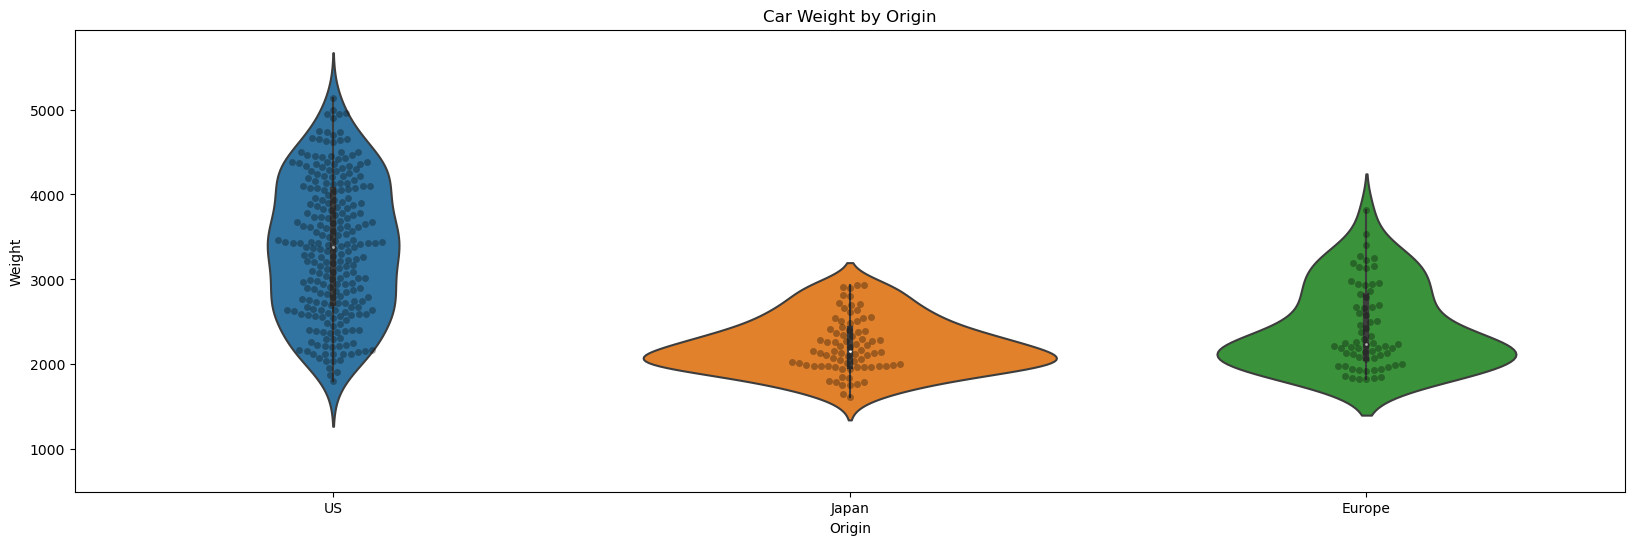

In [291]:
plt.figure(figsize=(20,6))
sns.violinplot(x=df.Origin, y=df.Weight)
sns.swarmplot(x=df.Origin, y=df.Weight, color="k", alpha=0.3)
plt.ylim(bottom=500)  
plt.ylim(top=df.Weight.max() + 800) 
plt.title('Car Weight by Origin')
plt.show()

Text(0.5, 1.05, 'Exploring Pairwise Relationships between Numeric Variables')

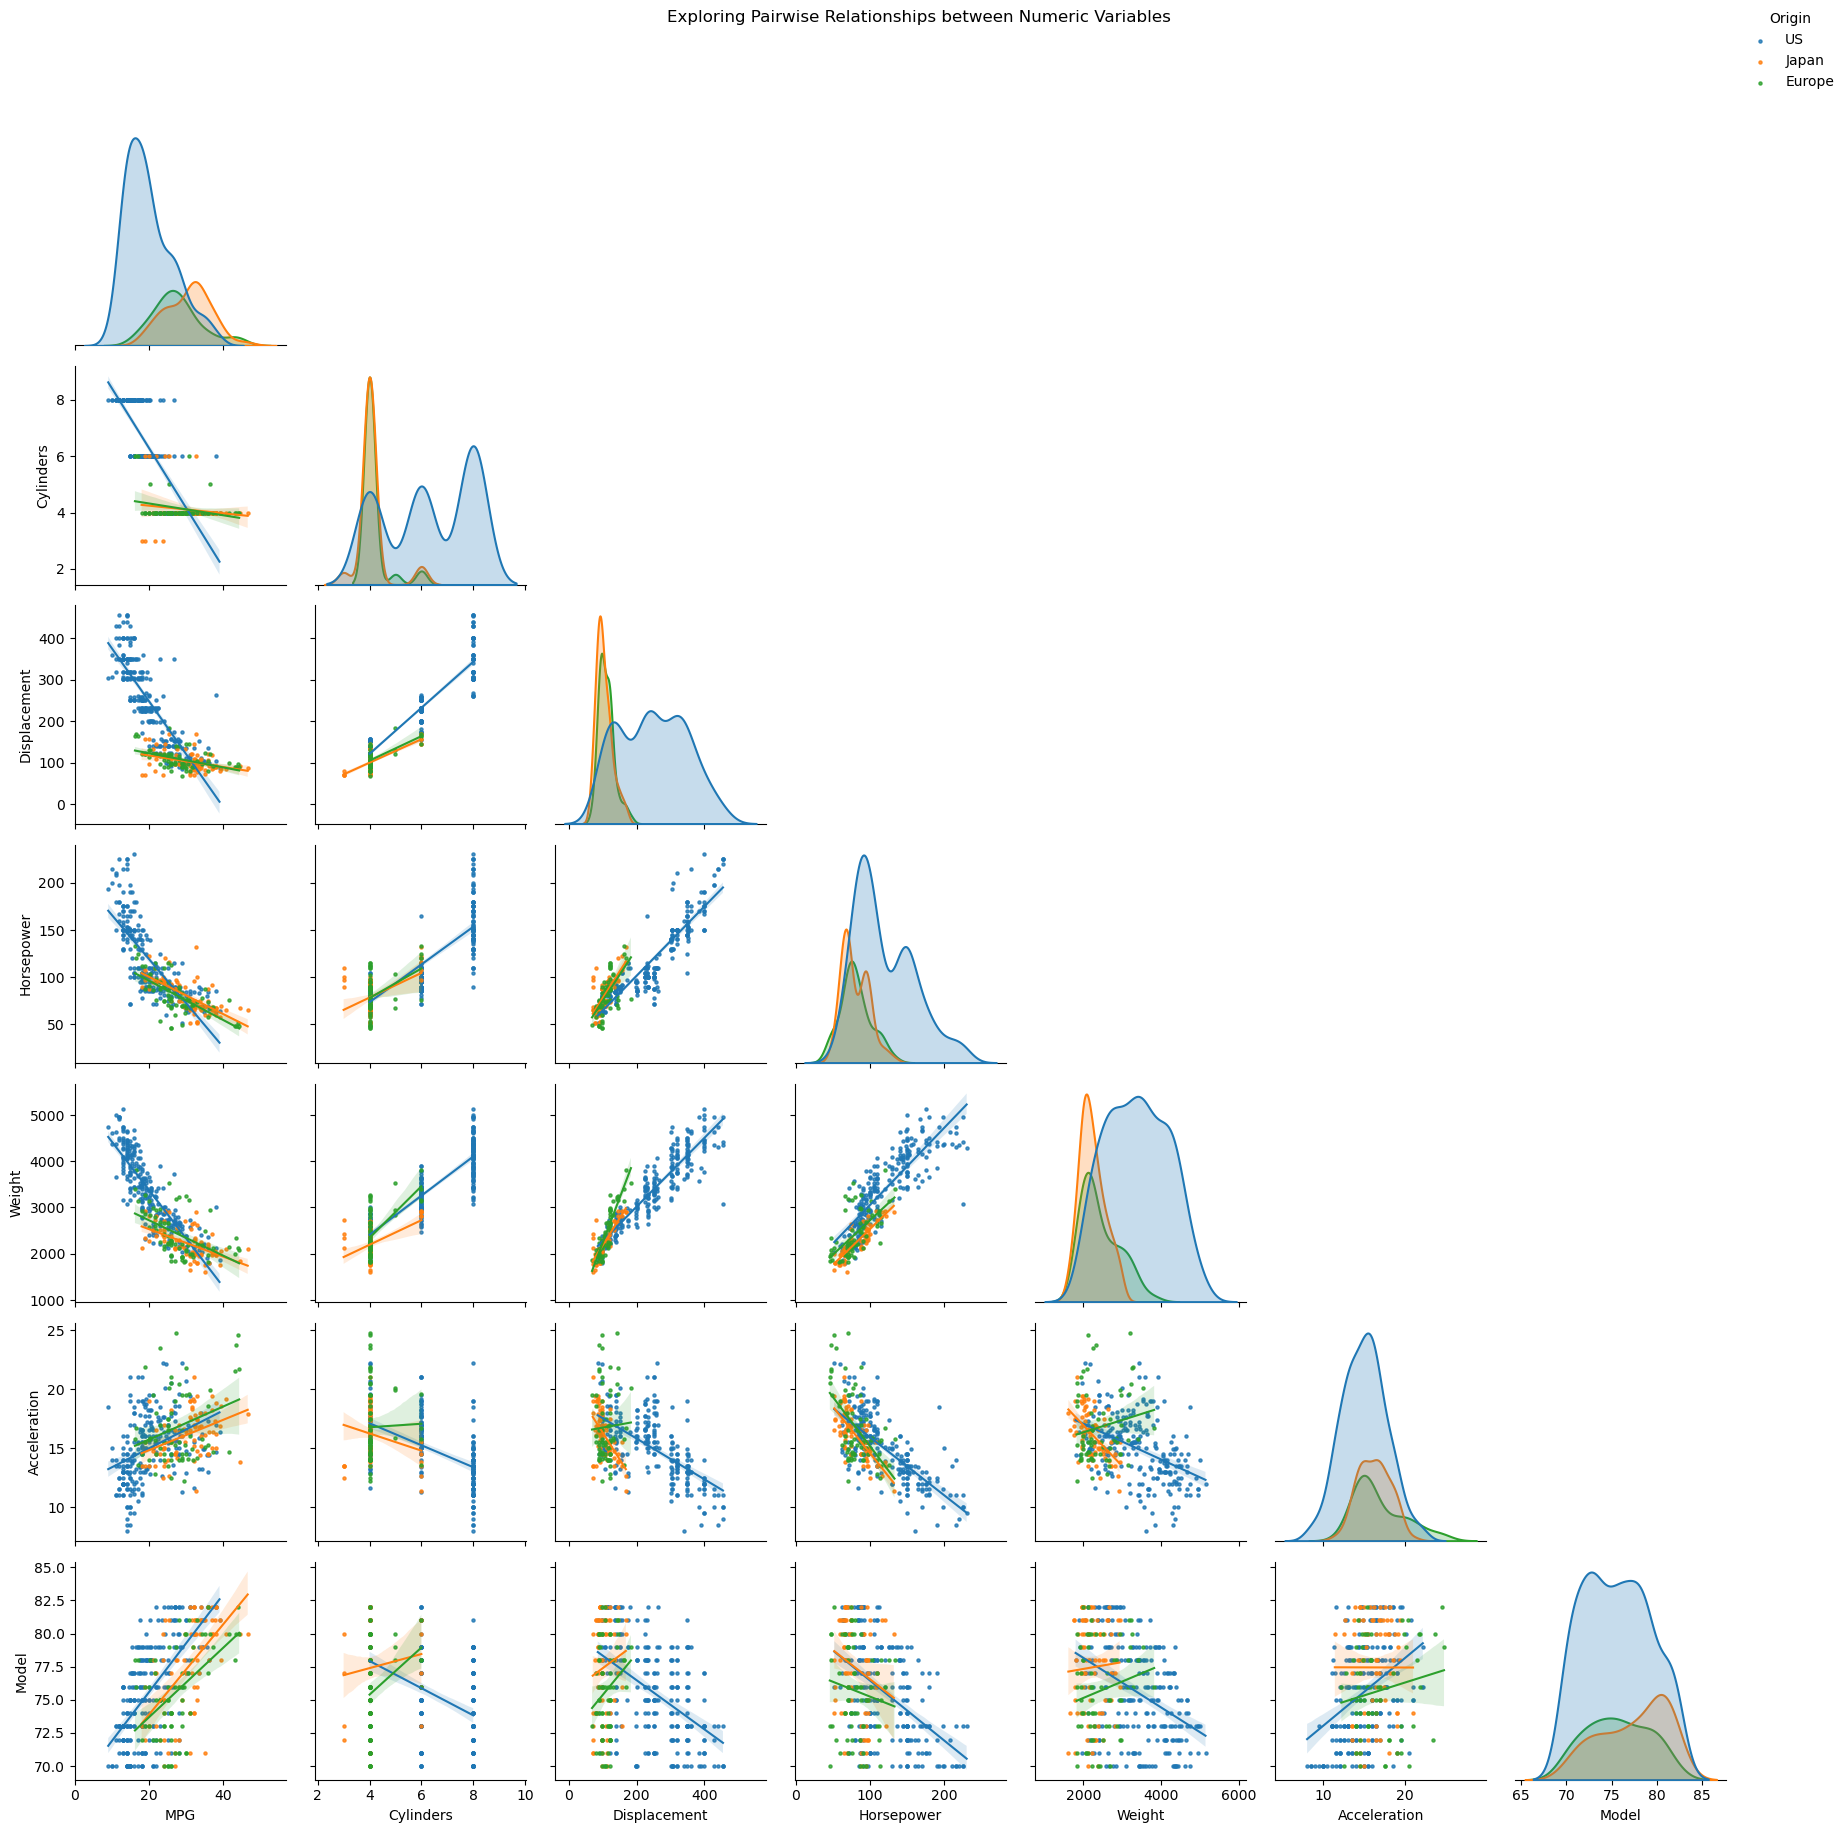

In [292]:
# Create a high level pairgrid plot
g = sns.PairGrid(df, corner=True, hue='Origin', diag_sharey=False)
g.map_diag(sns.kdeplot, fill=True, lw=1.5)
g.map_offdiag(sns.regplot, scatter_kws={'s': 5}, line_kws={'linewidth': 1.5})
g.add_legend(loc='upper right')
g.fig.suptitle("Exploring Pairwise Relationships between Numeric Variables", y=1.05)

Text(0.5, 1.05, 'Relationship between Features and Target Variable, Horsepower')

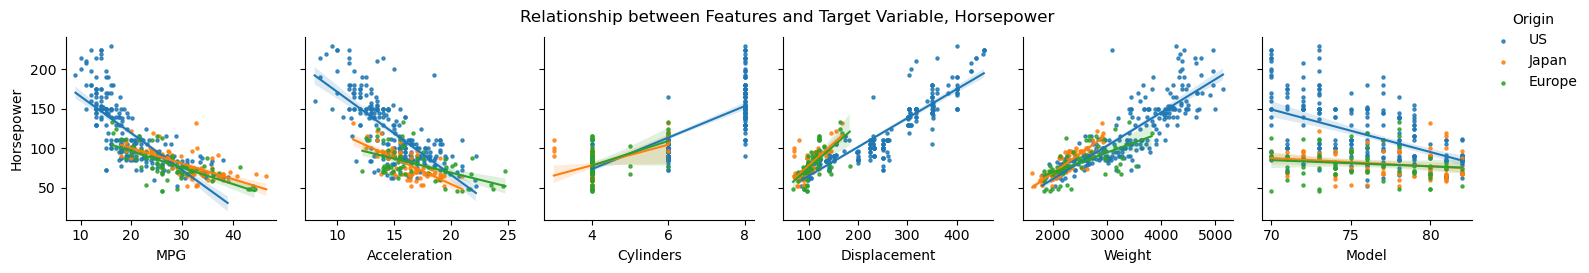

In [293]:
# Create a more granular pair grid plot
g = sns.PairGrid(df, hue='Origin', x_vars=['MPG', 'Acceleration', 'Cylinders', 'Displacement', 'Weight', 'Model'], y_vars=['Horsepower'])
g.map_offdiag(sns.regplot, scatter_kws={'s': 5}, line_kws={'linewidth': 1.5})
g.add_legend(loc='upper right')
g.fig.suptitle('Relationship between Features and Target Variable, Horsepower', y=1.05)

In [294]:
df = pd.get_dummies(df)
print(df.head())

    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  Model  Car_AMC Ambassador Brougham  Car_AMC Ambassador DPL  Car_AMC Ambassador SST  ...  Car_Volkswagen Type 3  Car_Volvo 144ea  Car_Volvo 145e (sw)  Car_Volvo 244DL  Car_Volvo 245  Car_Volvo 264gl  Car_Volvo Diesel  Origin_Europe  Origin_Japan  Origin_US
0  18.0          8         307.0       130.0  3504.0          12.0     70                            0                       0                       0  ...                      0                0                    0                0              0                0                 0              0             0          1
1  15.0          8         350.0       165.0  3693.0          11.5     70                            0                       0                       0  ...                      0                0                    0                0              0                0                 0              0             0          1
2  18.0          8         3

In [295]:
X = df.drop(['Horsepower'], axis=1)
y = df['Horsepower']

In [296]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [297]:
# To identify an optimal alpha value for the Lasso regularization technique
# Import dependencies
from sklearn.model_selection import GridSearchCV

# Define the alpha values to search
alpha_values = [0.01, 0.1, 1.0, 10.0]

# Create the Lasso model
lasso = Lasso()

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': alpha_values}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

# Print the best alpha value
print("Best alpha value:", best_alpha)


Best alpha value: 0.1


In [298]:
# Lasso for feature selection: instantiate lasso, fit the model to the data using the best alpha value
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_

In [299]:
names = df.drop(['Horsepower'], axis=1).columns

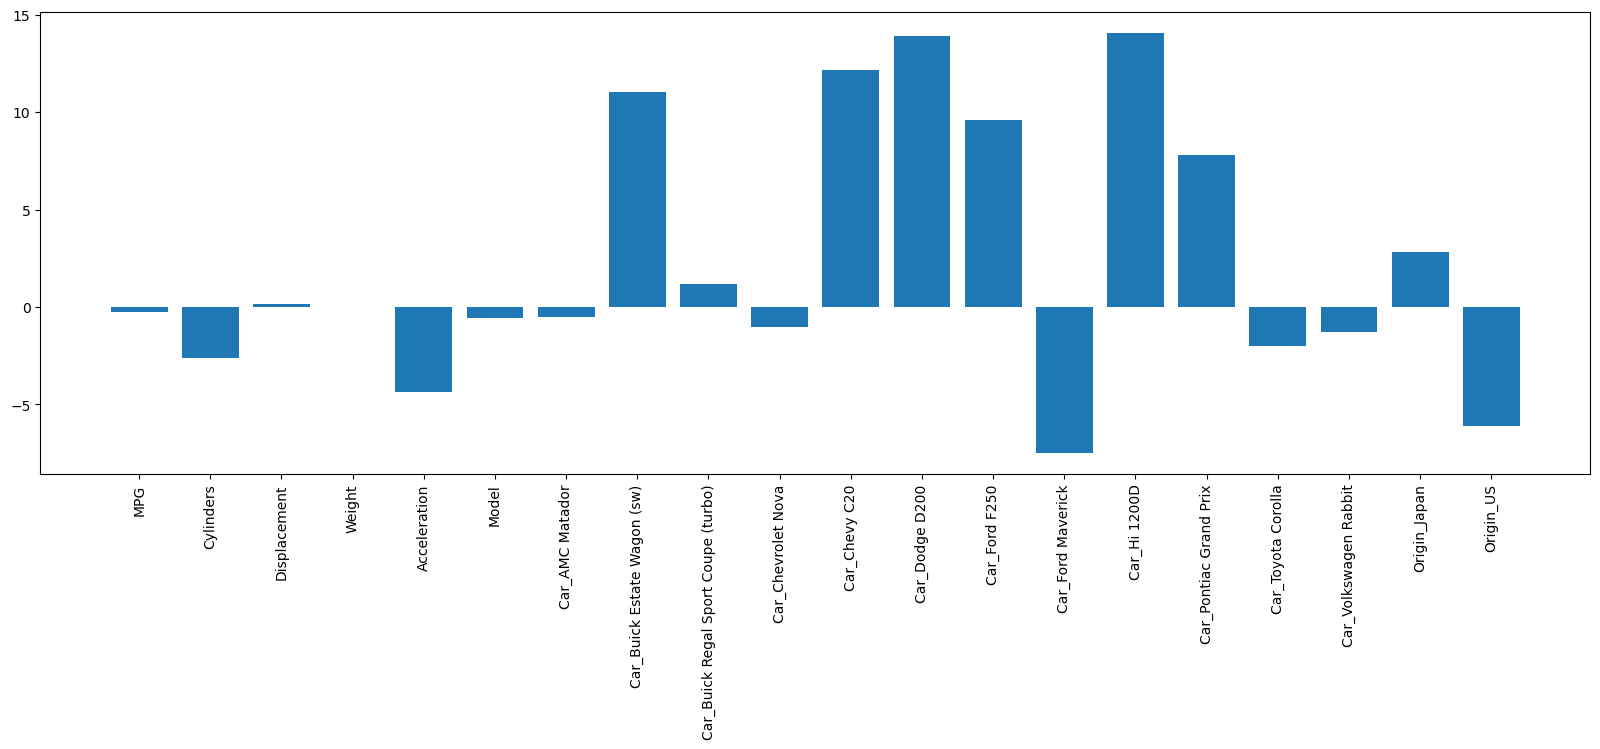

In [300]:
plt.figure(figsize=(20, 6))

# Filter the names and coefficients based on coefficients != 0
filtered_data = [(name, coef) for name, coef in zip(names, lasso_coef) if coef != 0]
filtered_names, filtered_coef = zip(*filtered_data)

# Plot the bar chart with the filtered names and coefficients
plt.bar(filtered_names, filtered_coef)
plt.xticks(rotation=90)

plt.show()

In [301]:
#Drop features that are not important
selected_columns = X.columns[lasso.coef_ != 0]
X_selected = X[selected_columns]

In [302]:
# Split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(274, 20) (118, 20) (274,) (118,)


In [303]:
# Train 5 different Models (ML Algorithms) at the same time to see which ones performs best
# Import dependencies
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Create 5 different pipelines, one for each algorithm
pipelines = {
    'rf': make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb': make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge': make_pipeline(Ridge(random_state=1234)),
    'lasso': make_pipeline(Lasso(random_state=1234)),
    'enet': make_pipeline(ElasticNet(random_state=1234)),
}

In [304]:
# Use get_params() to see what parameters are available.
RandomForestRegressor().get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [305]:
# Set up hyperparameter grid to tune the models to get a better prediction using different parameters.
# Create a dictionary with hyperparameters for each Algorithm
hypergrid = {
        'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3],
        'randomforestregressor__n_estimators': [100, 200, 300],
        'randomforestregressor__max_depth': [None, 5, 10],
        'randomforestregressor__min_samples_split': [2, 4, 6],
        'randomforestregressor__min_samples_leaf': [1, 2, 3],
        'randomforestregressor__max_features': ['sqrt', 'log2']
    },
    'gb': {
        'gradientboostingregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge': {
        'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
     'lasso': {
        'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
     'enet': {
        'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [306]:
# Import dependency that will perform the hyperparameter tuning
# GridSearchCV is already imported above
from sklearn.exceptions import NotFittedError

In [307]:
# Set up a dictionary to store the trained ML models
fit_models = {}
# loop through the pipelines
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.


rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [308]:
from sklearn.metrics import r2_score, mean_absolute_error

In [309]:
# Loop through and calculate both metrics for each of the models
for algo, model in fit_models.items():
    y_pred = model.predict(X_test)
    print('{} scores - R2: {} MAE:{},'.format(algo, r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred)))

rf scores - R2: 0.9046009102462321 MAE:6.889235025626564,
gb scores - R2: 0.9052060883600933 MAE:7.036760792853408,
ridge scores - R2: 0.9009193899032751 MAE:8.028805612654846,
lasso scores - R2: 0.9008700118114236 MAE:7.931163758249799,
enet scores - R2: 0.8982250698349553 MAE:8.10410133767,


In [310]:
# Return the predictions of the best performing model
y_pred = fit_models['rf'].predict(X_test)

In [311]:
# Create a new df combining the X_test (df holding only the features) with y_test(1D array of horsepower values)
preddf = X_test.join(y_test)
preddf

,MPG,Cylinders,Displacement,Weight,Acceleration,Model,Car_AMC Matador,Car_Buick Estate Wagon (sw),Car_Buick Regal Sport Coupe (turbo),Car_Chevrolet Nova,...,Car_Dodge D200,Car_Ford F250,Car_Ford Maverick,Car_Hi 1200D,Car_Pontiac Grand Prix,Car_Toyota Corolla,Car_Volkswagen Rabbit,Origin_Japan,Origin_US,Horsepower
48,14.0,8,318.0,4096.0,13.0,71,0,0,0,0,...,0,0,0,0,0,0,0,0,1,150.0
52,18.0,6,258.0,2962.0,13.5,71,0,0,0,0,...,0,0,0,0,0,0,0,0,1,110.0
313,28.8,6,173.0,2595.0,11.3,79,0,0,0,0,...,0,0,0,0,0,0,0,0,1,115.0
67,20.0,4,140.0,2408.0,19.5,72,0,0,0,0,...,0,0,0,0,0,0,0,0,1,90.0
276,30.9,4,105.0,2230.0,14.5,78,0,0,0,0,...,0,0,0,0,0,0,0,0,1,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,21.0,6,231.0,3039.0,15.0,75,0,0,0,0,...,0,0,0,0,0,0,0,0,1,110.0
398,32.0,4,144.0,2665.0,13.9,82,0,0,0,0,...,0,0,0,0,0,0,0,1,0,96.0
262,25.1,4,140.0,2720.0,15.4,78,0,0,0,0,...,0,0,0,0,0,0,0,0,1,88.0
142,18.0,6,225.0,3613.0,16.5,74,0,0,0,0,...,0,0,0,0,0,0,0,0,1,105.0


In [312]:
# Append the predicted array of values to the new df for comparison
preddf['Predicted_Horsepower'] = y_pred
preddf.head()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model,Car_AMC Matador,Car_Buick Estate Wagon (sw),Car_Buick Regal Sport Coupe (turbo),Car_Chevrolet Nova,...,Car_Ford F250,Car_Ford Maverick,Car_Hi 1200D,Car_Pontiac Grand Prix,Car_Toyota Corolla,Car_Volkswagen Rabbit,Origin_Japan,Origin_US,Horsepower,Predicted_Horsepower
48,14.0,8,318.0,4096.0,13.0,71,0,0,0,0,...,0,0,0,0,0,0,0,1,150.0,153.132698
52,18.0,6,258.0,2962.0,13.5,71,0,0,0,0,...,0,0,0,0,0,0,0,1,110.0,101.693737
313,28.8,6,173.0,2595.0,11.3,79,0,0,0,0,...,0,0,0,0,0,0,0,1,115.0,101.137074
67,20.0,4,140.0,2408.0,19.5,72,0,0,0,0,...,0,0,0,0,0,0,0,1,90.0,80.391662
276,30.9,4,105.0,2230.0,14.5,78,0,0,0,0,...,0,0,0,0,0,0,0,1,75.0,74.838804


In [313]:
# Create a difference column to compare predicted vs actual value
preddf['Difference'] = preddf['Horsepower'] - preddf['Predicted_Horsepower']
preddf.head()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model,Car_AMC Matador,Car_Buick Estate Wagon (sw),Car_Buick Regal Sport Coupe (turbo),Car_Chevrolet Nova,...,Car_Ford Maverick,Car_Hi 1200D,Car_Pontiac Grand Prix,Car_Toyota Corolla,Car_Volkswagen Rabbit,Origin_Japan,Origin_US,Horsepower,Predicted_Horsepower,Difference
48,14.0,8,318.0,4096.0,13.0,71,0,0,0,0,...,0,0,0,0,0,0,1,150.0,153.132698,-3.132698
52,18.0,6,258.0,2962.0,13.5,71,0,0,0,0,...,0,0,0,0,0,0,1,110.0,101.693737,8.306263
313,28.8,6,173.0,2595.0,11.3,79,0,0,0,0,...,0,0,0,0,0,0,1,115.0,101.137074,13.862926
67,20.0,4,140.0,2408.0,19.5,72,0,0,0,0,...,0,0,0,0,0,0,1,90.0,80.391662,9.608338
276,30.9,4,105.0,2230.0,14.5,78,0,0,0,0,...,0,0,0,0,0,0,1,75.0,74.838804,0.161196


In [314]:
# Sort the DataFrame by index
preddf = preddf.sort_index()
preddf.head()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model,Car_AMC Matador,Car_Buick Estate Wagon (sw),Car_Buick Regal Sport Coupe (turbo),Car_Chevrolet Nova,...,Car_Ford Maverick,Car_Hi 1200D,Car_Pontiac Grand Prix,Car_Toyota Corolla,Car_Volkswagen Rabbit,Origin_Japan,Origin_US,Horsepower,Predicted_Horsepower,Difference
7,14.0,8,440.0,4312.0,8.5,70,0,0,0,0,...,0,0,0,0,0,0,1,215.0,203.474429,11.525571
19,14.0,8,455.0,3086.0,10.0,70,0,1,0,0,...,0,0,0,0,0,0,1,225.0,173.789444,51.210556
28,25.0,4,104.0,2375.0,17.5,70,0,0,0,0,...,0,0,0,0,0,0,0,95.0,84.328711,10.671289
30,21.0,6,199.0,2648.0,15.0,70,0,0,0,0,...,0,0,0,0,0,0,1,90.0,96.160250,-6.160250
35,27.0,4,97.0,2130.0,14.5,71,0,0,0,0,...,0,0,0,0,0,1,0,88.0,86.174949,1.825051


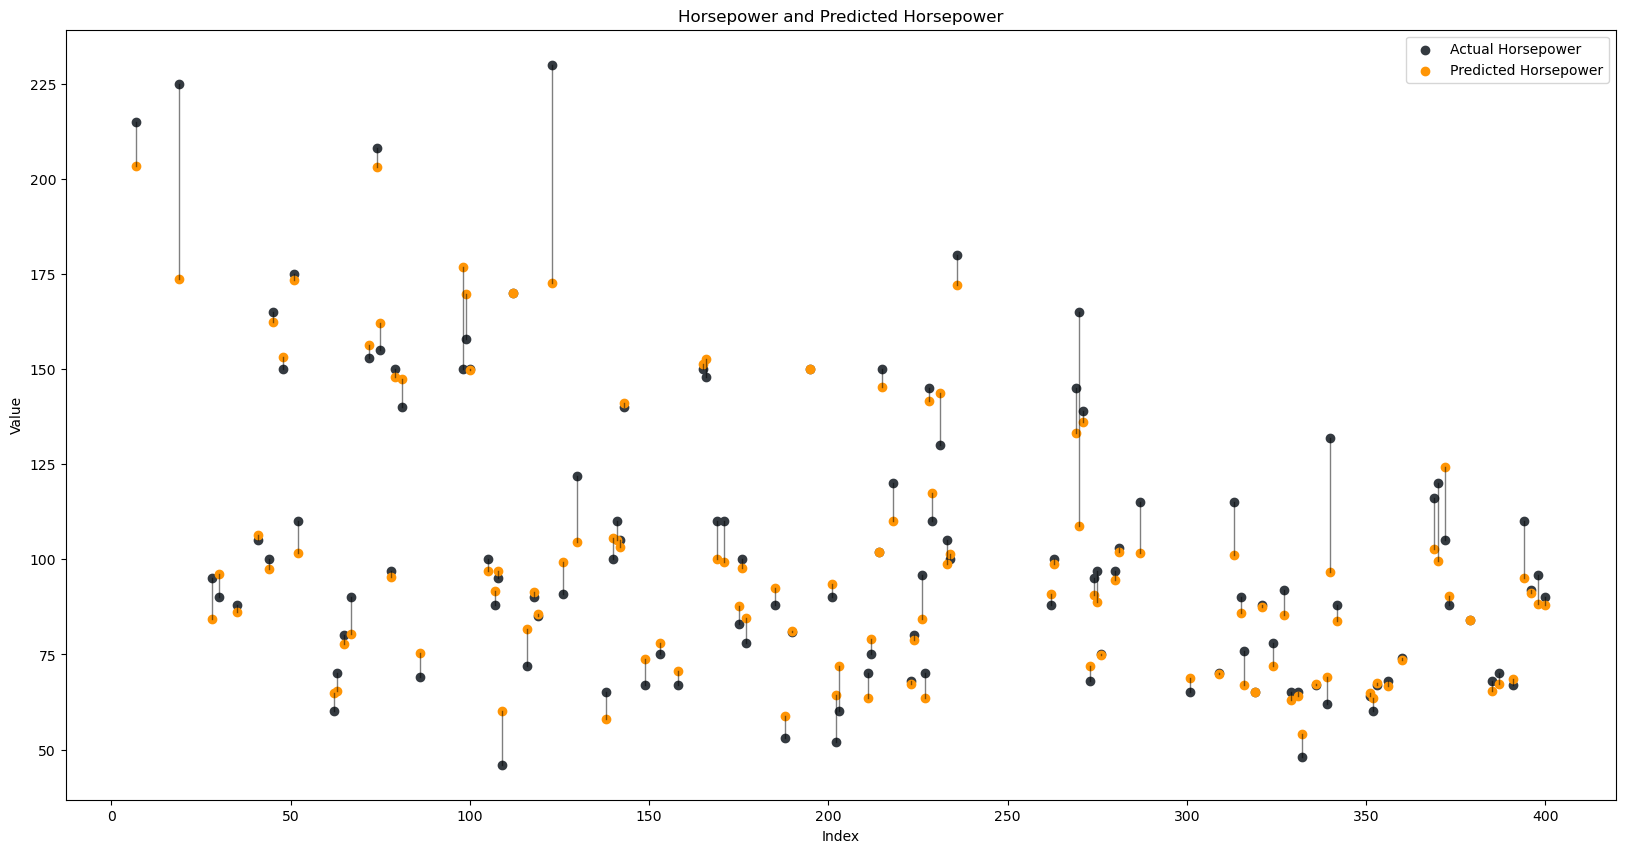

In [315]:
# Visualise the Difference
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# Plotting scatter plot of actual horsepower and predicted horsepower
plt.scatter(preddf.index, preddf['Horsepower'], color='#343a40', label='Actual Horsepower', marker='o')
plt.scatter(preddf.index, preddf['Predicted_Horsepower'], color='#ff9505', label='Predicted Horsepower', marker='o')

# Connect each pair of actual horsepower and predicted horsepower
for i in range(len(preddf)):
    plt.plot([preddf.index[i], preddf.index[i]], [preddf['Horsepower'].iloc[i], preddf['Predicted_Horsepower'].iloc[i]], color='black', linewidth=1, linestyle='-', alpha=0.5)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Horsepower and Predicted Horsepower')
plt.legend()
plt.show()